# 7.5.5 t-SNE Embedding

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

Esta metodología convierte las afinidades entre los puntos de datos a probabilidades que siguen una distribución normal. Esto hace que la metodología permita revelar la estructura inherente de los datos, tal como clusters.

In [3]:
digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

display(
    n_samples,
    n_features,
)

1083

64

Cada dígito está representado por una matriz de 8 x 8 pixels.

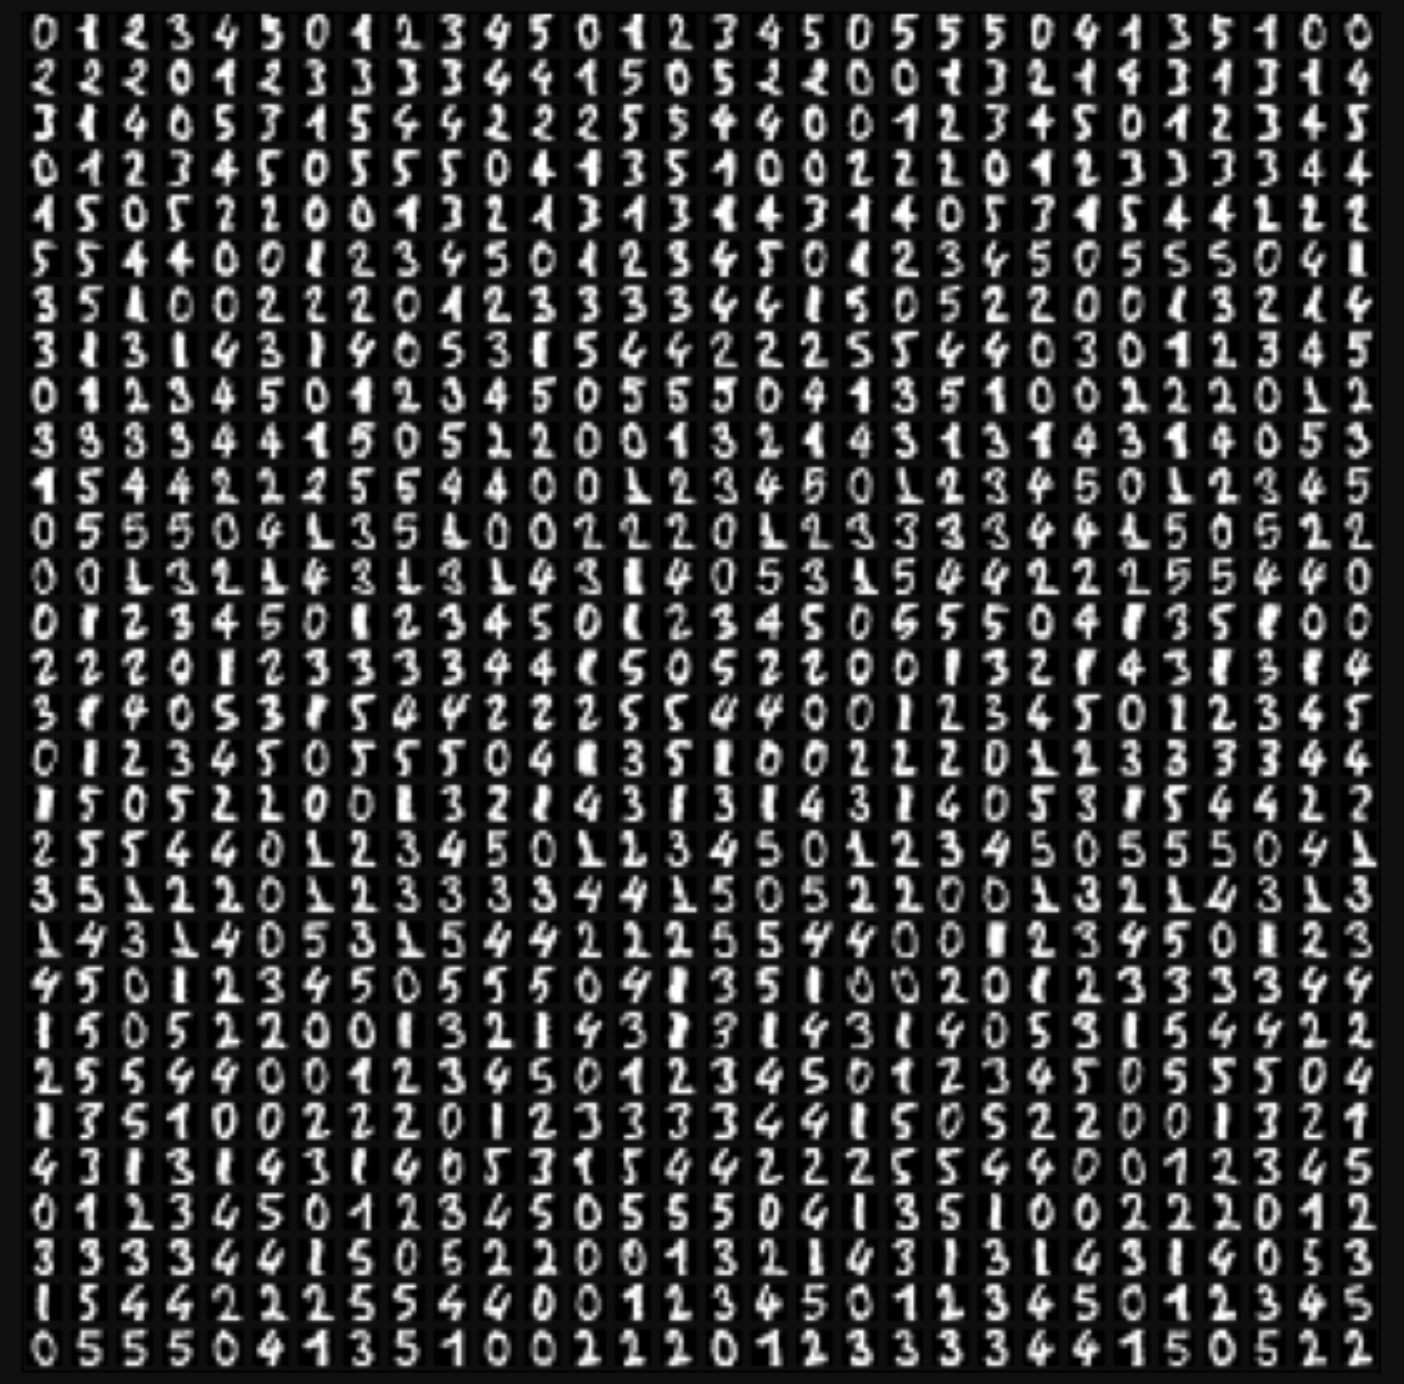

In [4]:
tsne = TSNE(
    # -----------------------------------------------------
    # Dimension of the embedded space.
    n_components=2,
    # -----------------------------------------------------
    # The perplexity is related to the number of nearest
    # neighbors that is used in other manifold learning
    # algorithms.
    perplexity=30,
    # -----------------------------------------------------
    # Maximum number of iterations for the optimization.
    n_iter=1000,
    # -----------------------------------------------------
    # Initialization of embedding.
    #   'pca'
    #   'random'
    init="pca",
    # -----------------------------------------------------
    # Determines the random number generator.
    random_state=0,
)

X_projected = tsne.fit_transform(X)

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_scaled = (X_projected - x_min) / (x_max - x_min)

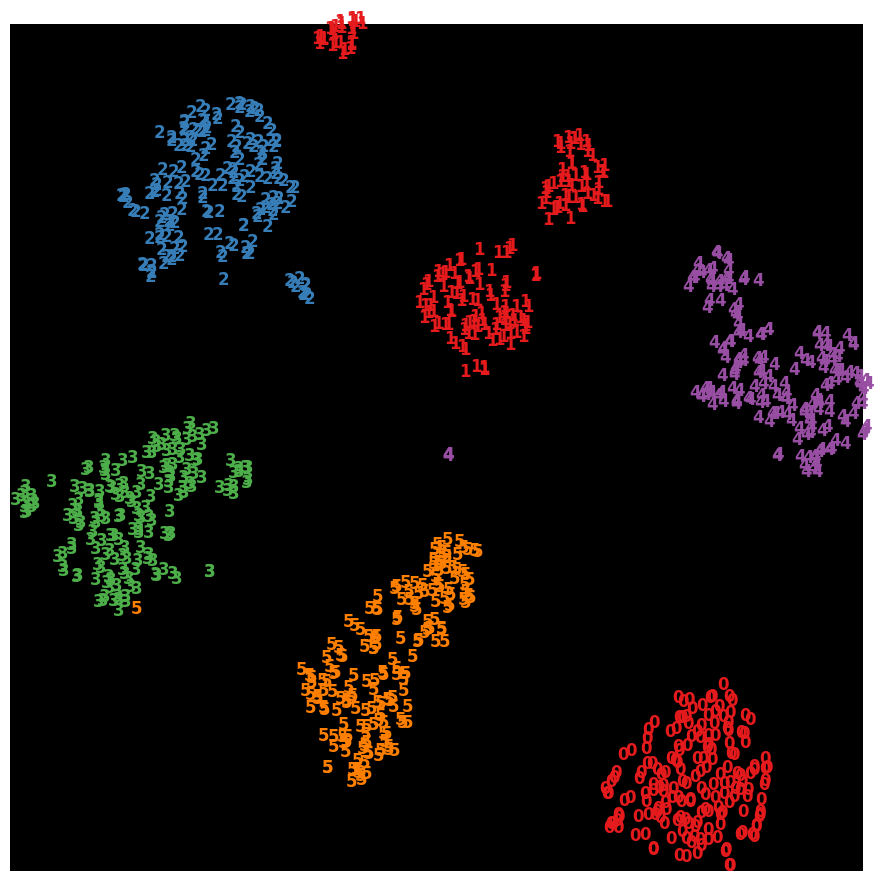

In [5]:
plt.figure(figsize=(11, 11))
plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )

plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()

## 7.5.5 Hiperparametros

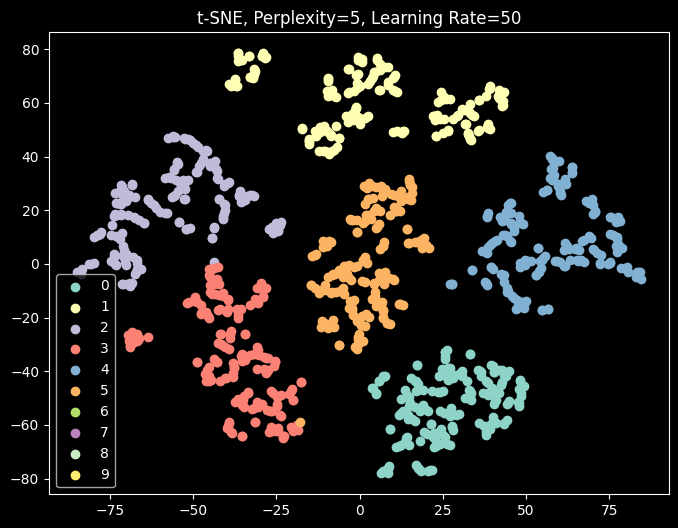

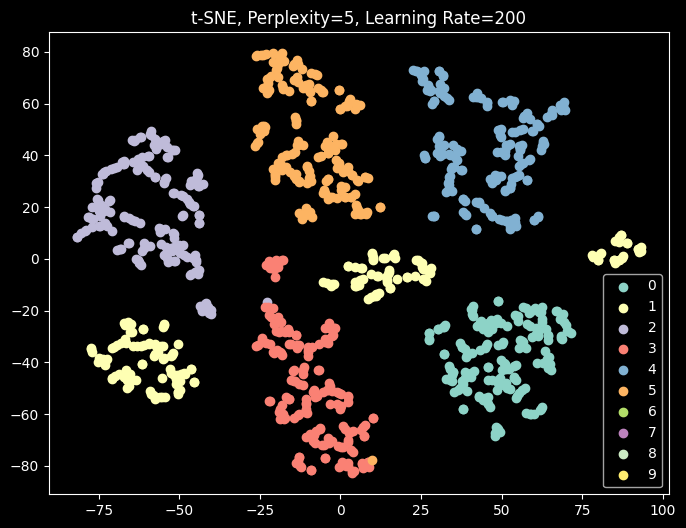

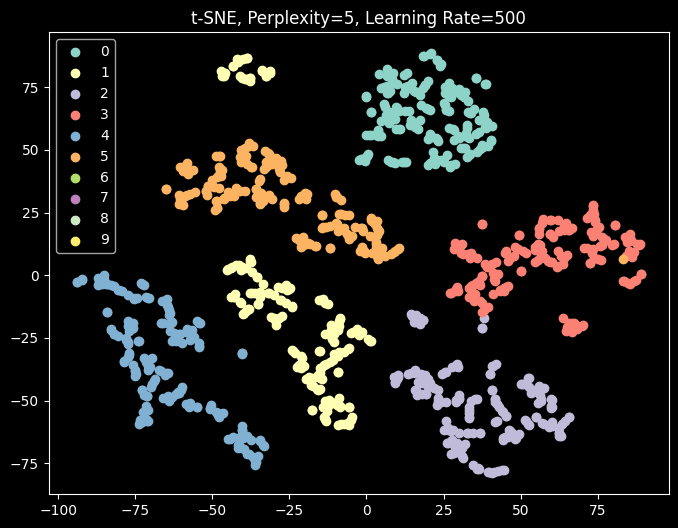

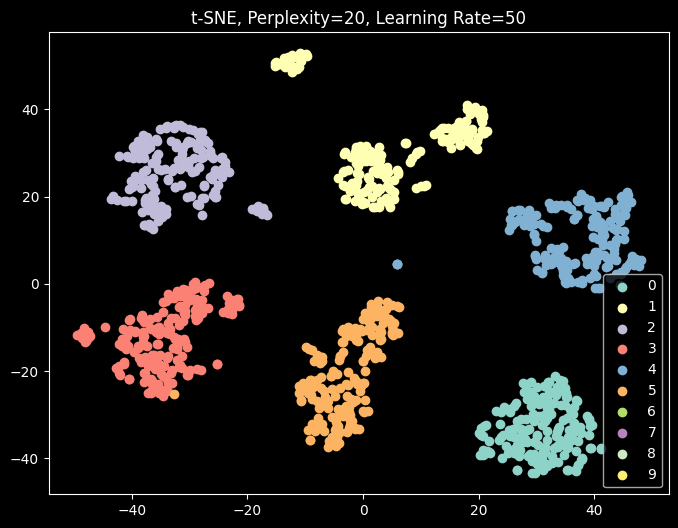

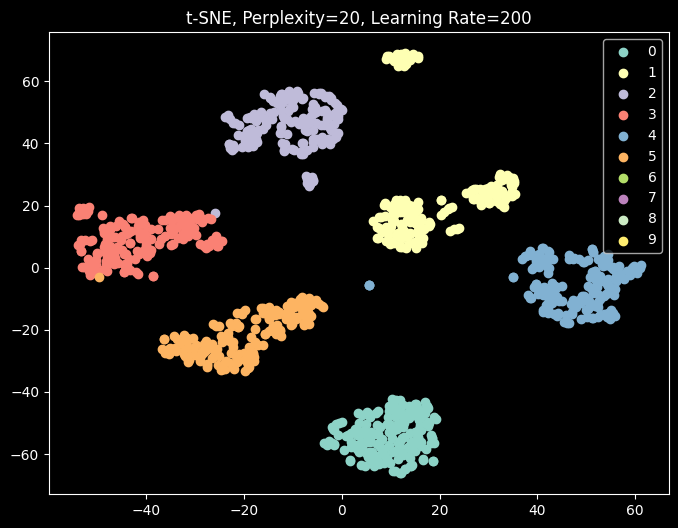

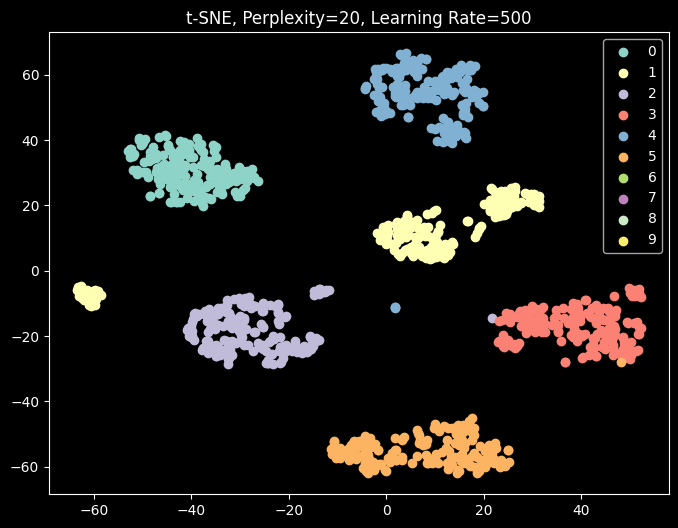

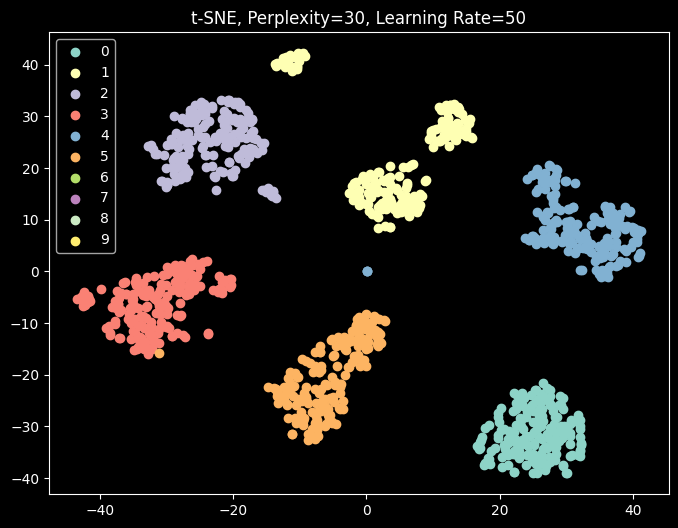

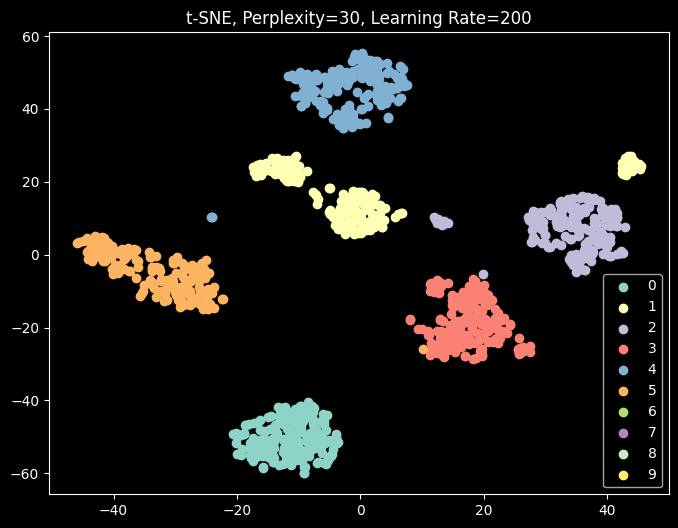

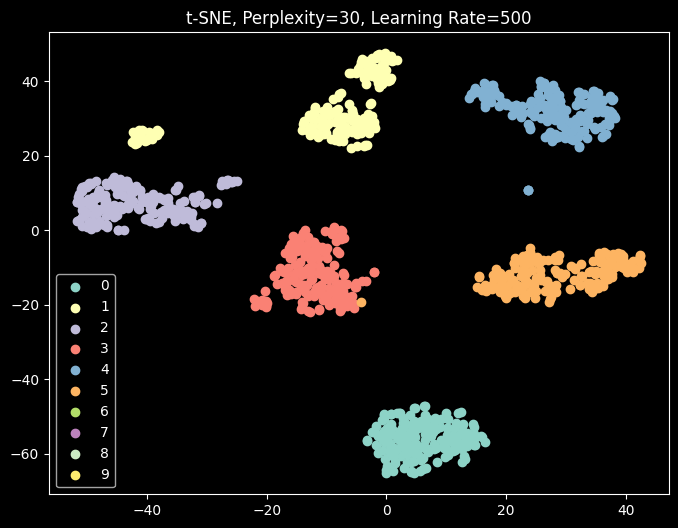

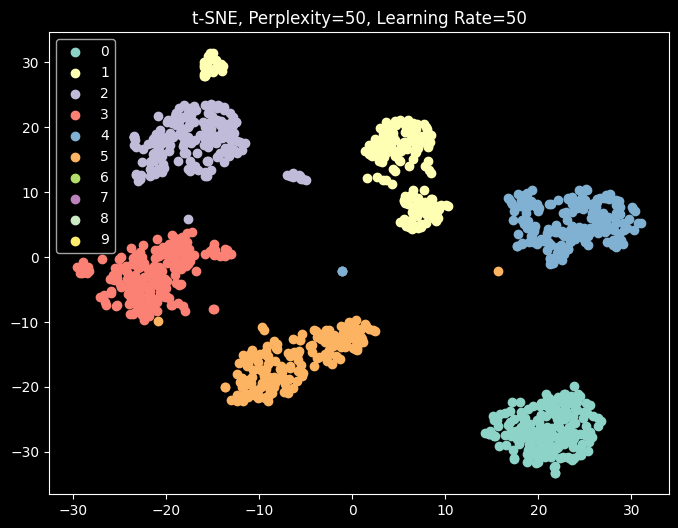

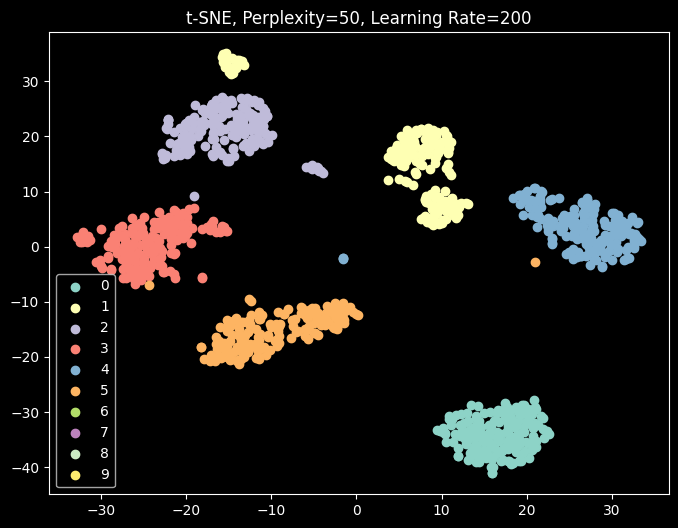

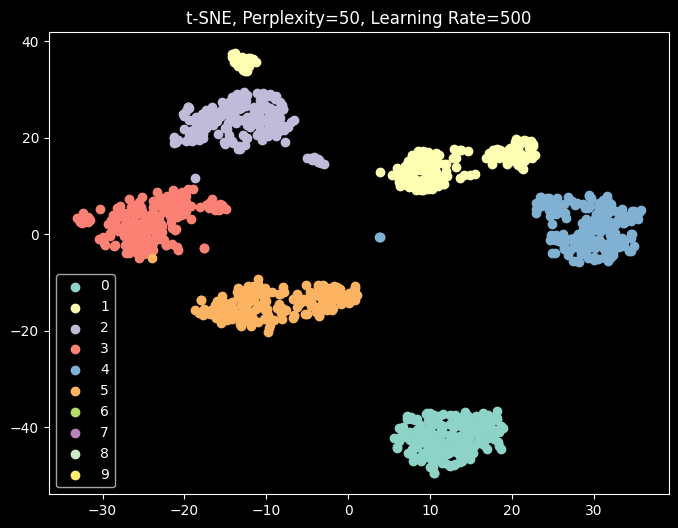

In [7]:
# Función para visualizar resultados de t-SNE
def plot_tsne(X_2d, y, title):
    plt.figure(figsize=(8, 6))
    for i in range(10):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], label=str(i))
    plt.title(title)
    plt.legend()
    plt.show()

# Experimentar con diferentes valores de perplexity y learning_rate
perplexities = [5, 20, 30, 50]
learning_rates = [50, 200, 500]

for perplexity in perplexities:
    for learning_rate in learning_rates:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        X_tsne = tsne.fit_transform(X)
        title = f"t-SNE, Perplexity={perplexity}, Learning Rate={learning_rate}"
        plot_tsne(X_tsne, y, title)


In [6]:
print('ok_')

ok_
